# Extract, Transform and Load Spotify Data Set
<hr>

### Dependencies

In [54]:
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine
import requests
import pymongo
import matplotlib.pyplot as plt

### Extract Data Set

In [39]:
path = "../Resources/songs.json"
spotify_data = pd.read_json(path)

In [40]:
spotify_data.head()

,Artist,Country,Date,Position,Streams,Track Name,Track URL
0,$hirak,Netherlands,2018-07-31 00:00:00+00:00,1,238729,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",https://open.spotify.com/track/77wz2VtAwxAwYOG...
1,$hirak,Netherlands,2018-08-02 00:00:00+00:00,1,245639,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",https://open.spotify.com/track/77wz2VtAwxAwYOG...
2,187 Strassenbande,Germany,2017-07-23 00:00:00+00:00,1,387632,Millionär,https://open.spotify.com/track/6mw02h3qbWmuq2b...
3,5 Seconds of Summer,Australia,2018-06-29 00:00:00+00:00,1,261795,Youngblood,https://open.spotify.com/track/2iUXsYOEPhVqEBw...
4,5 Seconds of Summer,Australia,2018-06-11 00:00:00+00:00,1,276266,Youngblood,https://open.spotify.com/track/55S2PQgSMYAhgoT...


In [41]:
# spotify_data.sort_values(by=['Date']).head(50)

In [58]:
streams_by_date = spotify_data.groupby("Date").sum("Streams").sort_values(by=['Date']).reset_index()
streams_by_date["Date"] = streams_by_date["Date"].dt.strftime("%m/%d/%y")
streams_by_date = streams_by_date[["Date","Streams"]]
streams_by_date.count()

Date       909
Streams    909
dtype: int64

<AxesSubplot:>

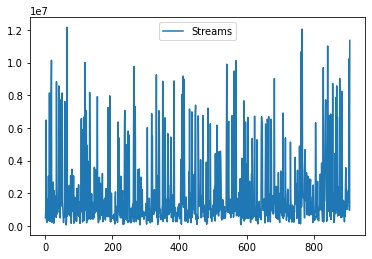

In [48]:
streams_by_date.plot()

AttributeError: 'Series' object has no attribute 'DateFormatter'

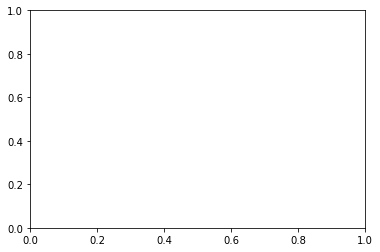

In [59]:
x_values = streams_by_date["Date"]
y_values = streams_by_date["Streams"]

ax = plt.gca()
# get axes

formatter = x_values.DateFormatter("%Y-%m-%d")
# format as dates

ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator()
# set locator

ax.xaxis.set_major_locator(locator)

plt.plot(x_values, y_values)